<a href="https://colab.research.google.com/github/RobertoMejiaLacayo/cap-comp215/blob/main/Sos%26Roberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# this is our key: k_w26fb6h9
# api url top 250 movies: https://imdb-api.com/en/API/Top250Movies/k_w26fb6h9
# api url for movie casst: https://imdb-api.com/en/API/FullCast/k_w26fb6h9/${movie ID}

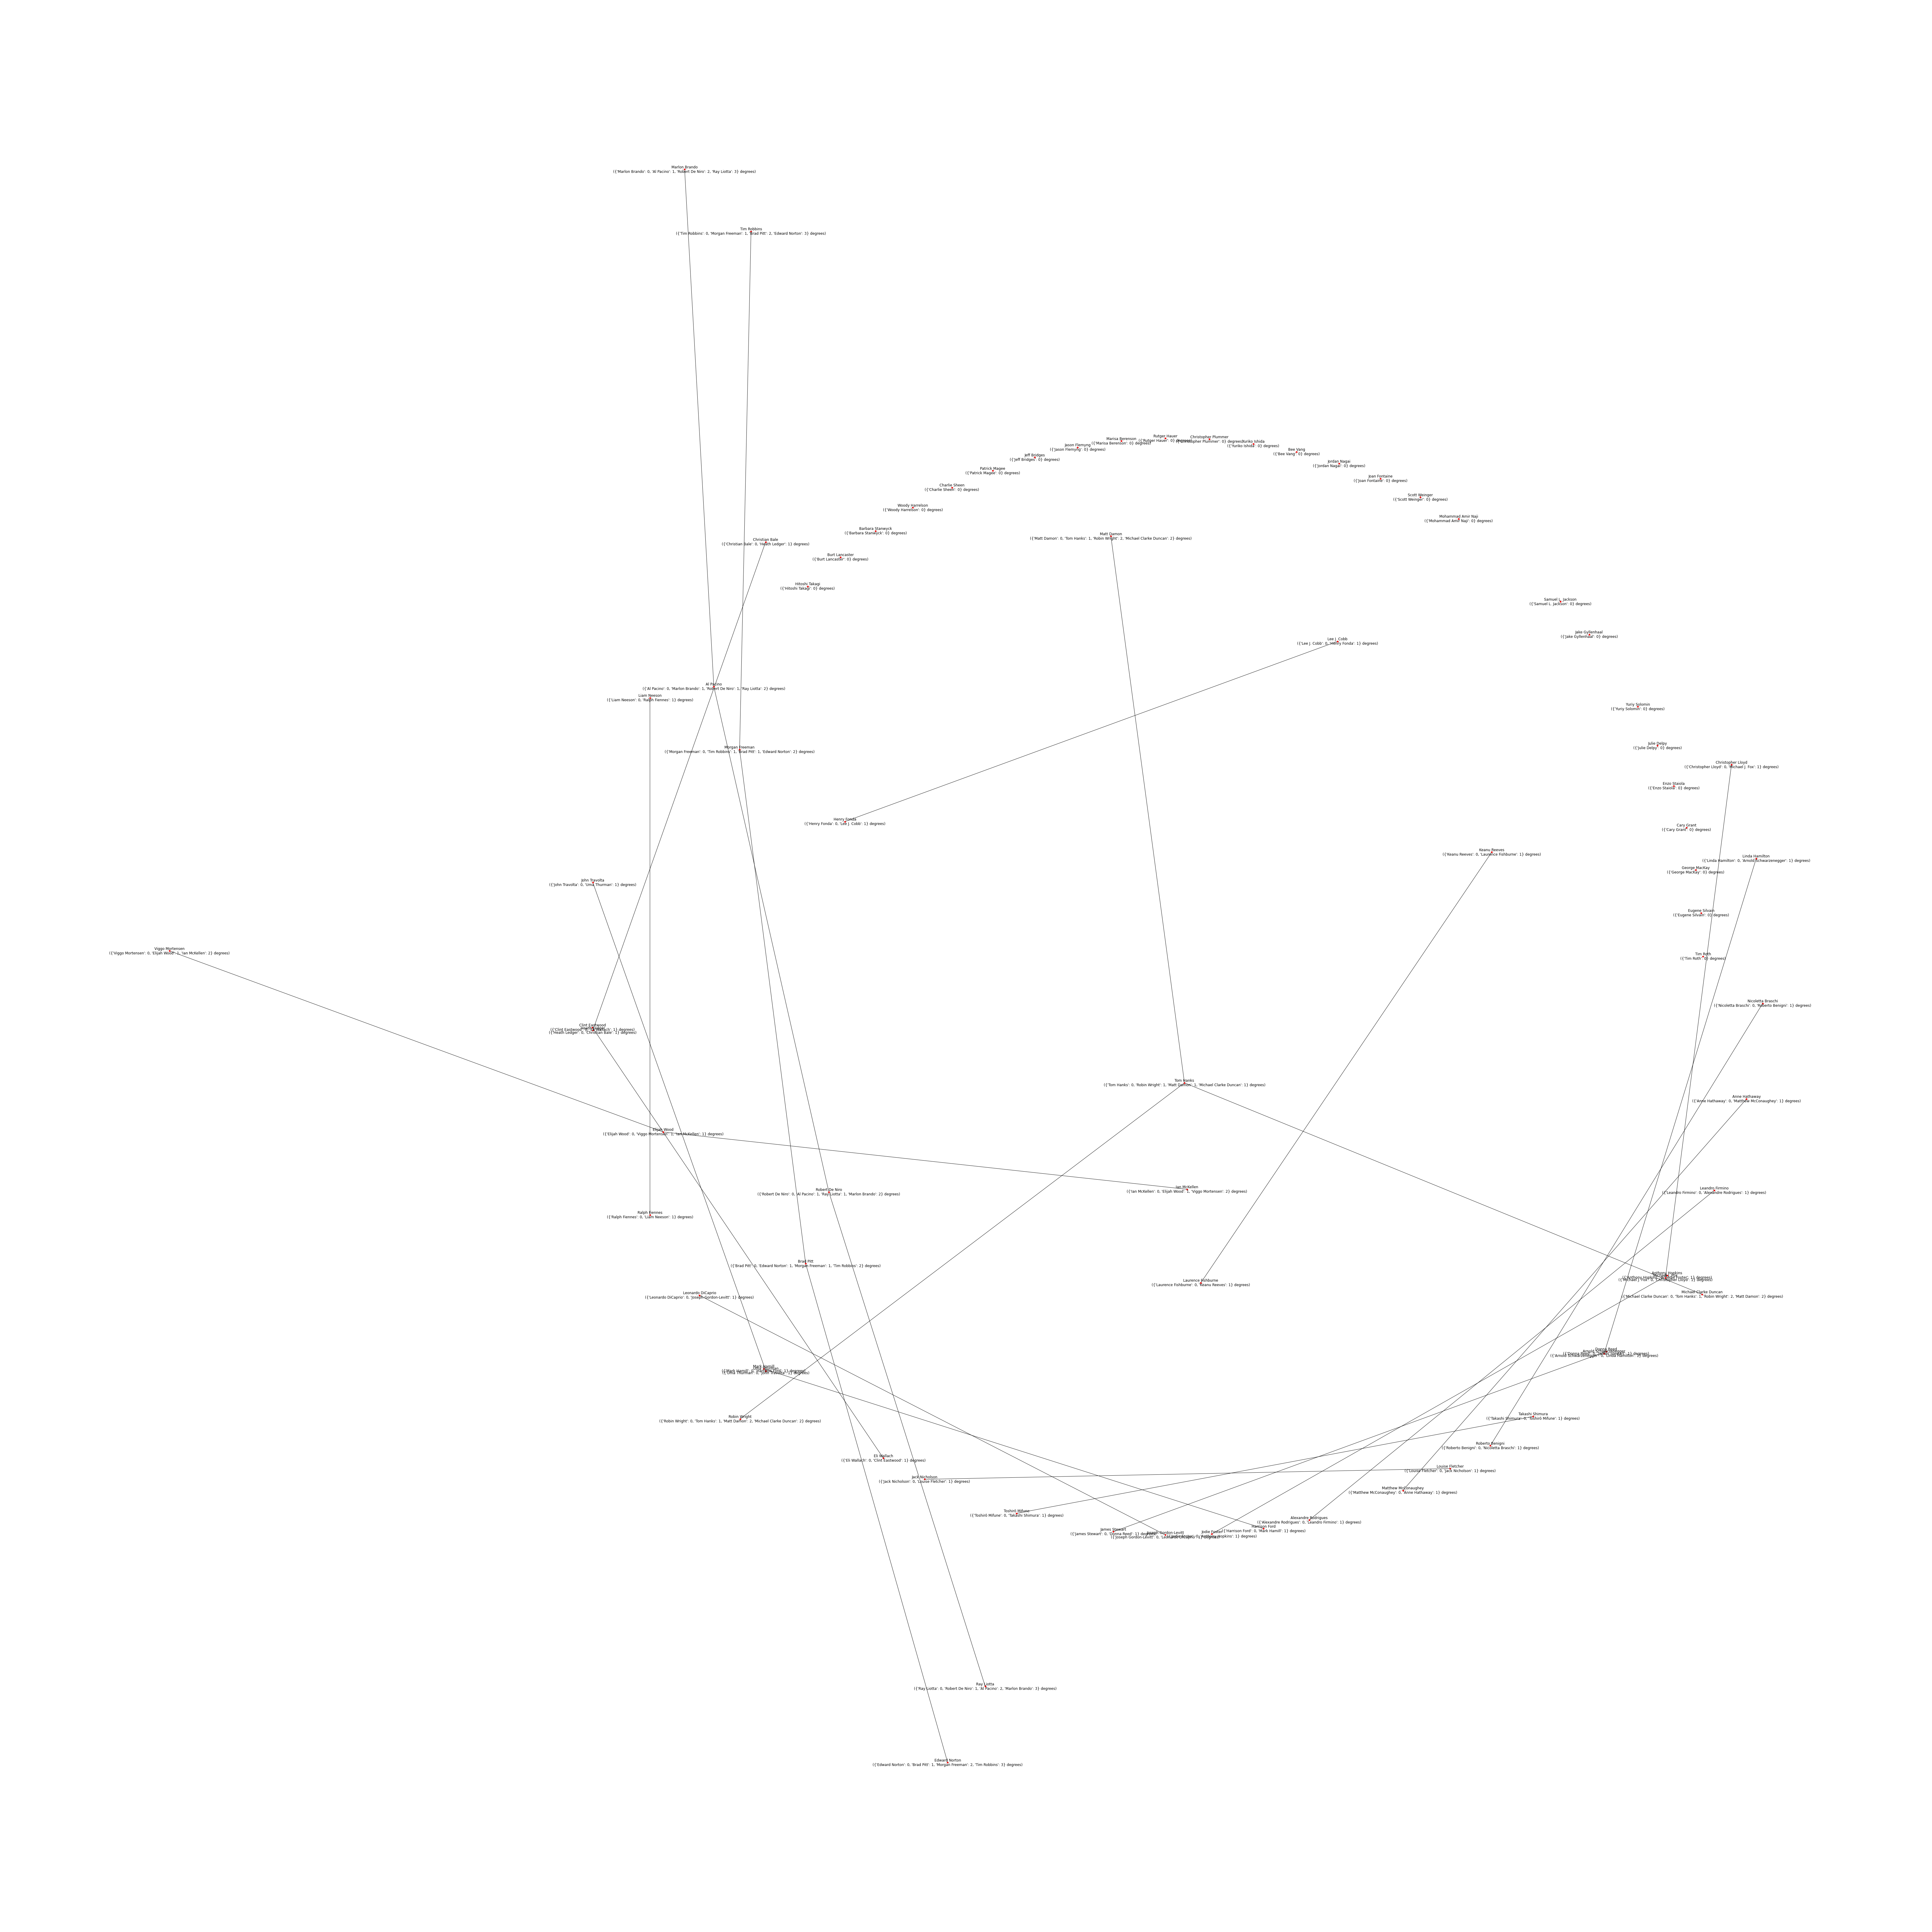

In [80]:
import json, requests
from pprint import pprint
from dataclasses import dataclass
import matplotlib.pyplot as plt
import networkx as nx

@dataclass
class Actor:
  name : str
  id : str
  image : str

  @classmethod
  def createActor(cls, name, id, image):
    return cls(name, id, image)
    

@dataclass
class Movie:
  title : str
  id : str
  image: str

  @classmethod
  def createMovie(cls, title, id, image):
    return cls(title, id, image)

API_KEY = 'k_w26fb6h9'

url = f'https://imdb-api.com/en/API/Top250Movies/k_w26fb6h9'

response = requests.request("GET", url, headers={}, data={})

data = json.loads(response.text)

movies = [(movie['title'],
          movie['id'],
          movie['image']) for movie in data['items']]

movie_items = [data for data in data['items']]

#collects last two crew members (actors) from 'crew' key in items
crew = [[crew['crew'].split(', ')[-2], crew['crew'].split(', ')[-1]] for crew in data['items']]
# pprint(crew) #ONE OF THE THINGS WE NEED

allActors = set() #OTHER PIECE OF DATA WE NEED

for pair in crew:
  allActors.add(pair[0])
  allActors.add(pair[1])

set_of_actors = set()
for i in range(len(crew)):
  for x in range(2): #because each crew group comes with 2 actors
    #adding actors by their 1st name and initials of 2nd coz graph labels are too long and clutter the space
    if len(crew[i][x].split(' ')) > 1: #checks if actor has more than 1 fisrt name
      set_of_actors.add(' '.join((crew[i][x].split(' ')[0], crew[i][x].split(' ')[1]))) #joins 1st name and first 2 letters of last name
    else: #if they're only referenced by one name i.e Zendaya, (thus not having an initial for 2nd name)
      set_of_actors.add(crew[i][x]) #add their one name only
  
movieid_actor =  [(movie_info['id'], (movie_info['crew'].split(', ')[-2], movie_info['crew'].split(', ')[-1])) for movie_info in movie_items]
movieid_dict =  {movie_info['id'] : (movie_info['crew'].split(', ')[-2], movie_info['crew'].split(', ')[-1]) for movie_info in movie_items}

actors_dict = {actor: set() for actor in set_of_actors}
for (key, value) in movieid_actor:
  if value[0].count(" ") == 2 or value[1].count(" ") == 2:
    continue
  actors_dict[value[0]].add(key)
  actors_dict[value[1]].add(key)

actors_dict = {k : v for k,v in actors_dict.items() if v !=set()}

movie_id = 'tt1950186' #random movie id i picked from data['items'] in 4th code block

url = f'https://imdb-api.com/en/API/FullCast/k_w26fb6h9/{movie_id}'

response = requests.request("GET", url, headers={}, data={})

data = json.loads(response.text)

fullcast=[]
fullcast = [(actor['name'],
            actor['id'],
            actor['image']) for actor in data['actors']]

MovieObjects = [Movie.createMovie(title, id, image) for (title, id, image) in movies]

ActorObjects = [Actor.createActor(name, id, image) for (name, id, image) in fullcast]

# crew, allActors
allActorsList = list(allActors)

crew = crew[:30]
allActorsList = allActorsList[:30]

# Create a graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(allActorsList)

# Add edges to the graph
G.add_edges_from(crew)

# Calculate shortest path lengths between all pairs of nodes
path_lengths = dict(nx.shortest_path_length(G))

# Draw the graph with node labels indicating degree of separation
pos = nx.kamada_kawai_layout(G)
plt.figure(3,figsize=(90,90))
nx.draw(G, pos, node_color='red',
                 font_size = 2,
                 node_size=20,
                 with_labels=True)
labels = {actor: f"{actor}\n({degree} degrees)" for actor, degree in path_lengths.items()}
nx.draw_networkx_labels(G, pos, labels=labels)

# Show the graph
plt.show()